## Phase Two Project Submission

**The Author:** Sally Musanga Kabole



In [46]:
# Your code here - remember to use markdown cells for comments as well!

## Project Overview

This project uses regression modeling to analyze the King County House Sales dataset and provide insights to home owners on factors affecting the sale price of their houses. The aim of this analysis is to build  regression model that can predict house prices with the greatest accuracy possible. 




## Business Problem

Consider a startup in the real estate space that wants to make a successful house sale for their client. In order to price any client's home competitively  and get offers from prospective buyers,The startup contacts a data scientist to give insights into what can be done to increase house prices.



## Data Understanding


For my case price is the dependant variable 
The goal ois analysis is to examine two things:
    - Which set of predictor variables do a good job in predictingthe price of a house. 
    - Which variables in particular are significant predictors of the outcome variable, and by what magnitude

In [47]:
#Importing python libraries
import numpy as np #numeric computations
import pandas as pd #datapreprocessing,
import seaborn as sns #for plotting graphs
import matplotlib.pyplot as plt

In [48]:
# import data into pandas dataframe and ran df.info() to learn about the shape, columns and datatypes.
house_data =pd.read_csv('data/kc_house_data.csv')
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [49]:
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


** Observation
Almost all of the columns contain numeric data

In [50]:
print(house_data.isnull().sum())

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


In [51]:
#Checking proportion of missing values in each column.

for column in house_data.columns:
    proportion_of_nas = (sum(house_data[column].isnull())/len(house_data[column])) * 100 
    print(column, proportion_of_nas)
    


id 0.0
date 0.0
price 0.0
bedrooms 0.0
bathrooms 0.0
sqft_living 0.0
sqft_lot 0.0
floors 0.0
waterfront 11.00152798999861
view 0.29170718155299347
condition 0.0
grade 0.0
sqft_above 0.0
sqft_basement 0.0
yr_built 0.0
yr_renovated 17.78950780200954
zipcode 0.0
lat 0.0
long 0.0
sqft_living15 0.0
sqft_lot15 0.0


** Observation
yr_renovated,waterfront and view havemissing values

## Data Preparation


In [52]:
# Check for duplicate records
print('Number of duplicate records: ', sum(house_data.duplicated()))


Number of duplicate records:  0


In [53]:
# Check for duplicate IDs
display(house_data['id'].value_counts().head())

# Count non-unique IDs
id_value_counts = house_data['id'].value_counts()
num_repeat_ids = len(id_value_counts[id_value_counts > 1])*2 + 1
print('Number of non-unique IDs: ', num_repeat_ids)

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
Name: id, dtype: int64

Number of non-unique IDs:  353


In [54]:
# Inspect a few of the records with duplicate IDs
display(house_data[house_data['id'] == 795000620])
display(house_data[house_data['id'] == 1825069031])


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17588,795000620,9/24/2014,115000.0,3,1.0,1080,6250,1.0,0.0,0.0,...,5,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17589,795000620,12/15/2014,124000.0,3,1.0,1080,6250,1.0,0.0,0.0,...,5,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17590,795000620,3/11/2015,157000.0,3,1.0,1080,6250,1.0,NaN,0.0,...,5,1080,0.0,1950,NaN,98168,47.5045,-122.33,1070,6250


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3946,1825069031,8/14/2014,550000.0,4,1.75,2410,8447,2.0,0.0,3.0,...,8,2060,350.0,1936,1980.0,98074,47.6499,-122.088,2520,14789
3947,1825069031,10/16/2014,550000.0,4,1.75,2410,8447,2.0,NaN,3.0,...,8,2060,350.0,1936,1980.0,98074,47.6499,-122.088,2520,14789


** there is a small number of non-unique values in the id column.
The observations have different dates, different prices, etc. I choose to retain the column and assume that they represent different sales of the same house.


In [55]:
# Check the number of unique values in each column
unique_vals_list = []
for col in house_data.columns:
    unique_vals_list.append({'column': col, 'unique values': len(house_data[col].unique())})
pd.DataFrame(unique_vals_list)

,column,unique values
0,id,21420
1,date,372
2,price,3622
3,bedrooms,12
4,bathrooms,29
5,sqft_living,1034
6,sqft_lot,9776
7,floors,6
8,waterfront,3
9,view,6


In [56]:
# Create a function to create histograms
def hist_it(house_data):
    
    """Creates histograms of all numeric columns in a DataFrame"""
    
    house_data.hist(figsize=(16,14))

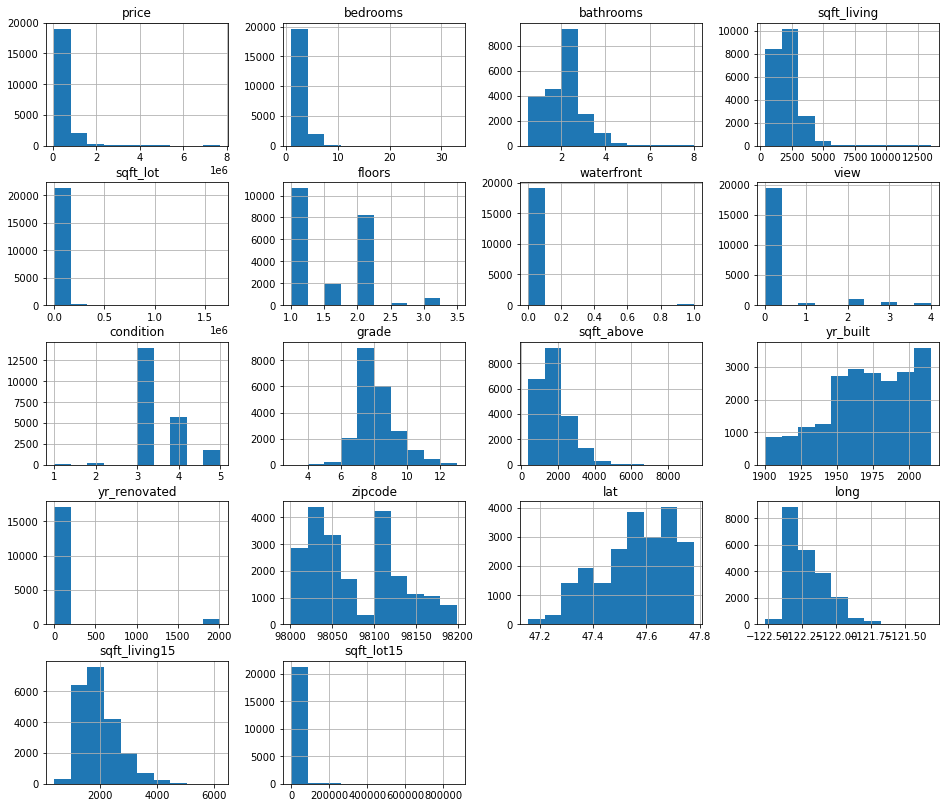

In [57]:
# Create histograms for numerical variables
data_for_hist = house_data.drop(['id'], axis=1)

hist_it(data_for_hist)

**Observations
price,bedroom,bathrooms, sqft_living,sqft_lot, condition,grage,sqft_bove,long, sqft_living15,sqft_lot15 exhibit normal distribution

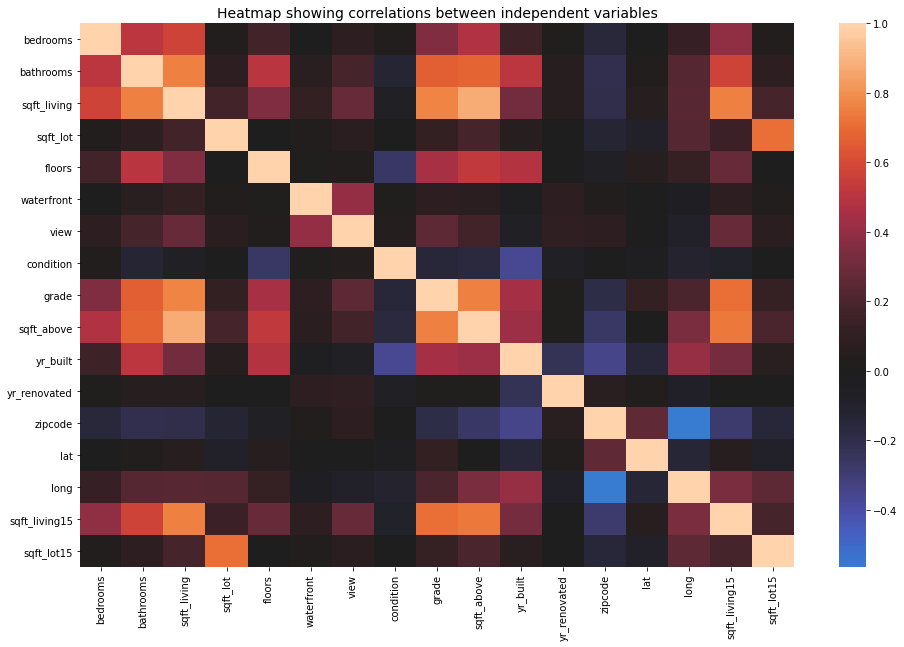

In [58]:
#Checking if any of the independent variables strongly correlated with each other
# Create the correlation heatmap
data_for_scatter_matrix = house_data.drop(['price', 'id'], axis=1)

plt.figure(figsize=(16,10))
sns.heatmap(data_for_scatter_matrix.corr(), center=0)
plt.title('Heatmap showing correlations between independent variables', fontsize=14)
plt.show();

**We notice that sqft_living and sqft_above have a correlation coefficient of 0.8 or above .Since sqft_living = sqft_above + sqft_basement, We drop  sqft_above to avoid potential effects caused by multicollinearity.

In [59]:
# Check for missing values by column
house_data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [60]:
"""
Investigating further on waterfront column
"""
# View value counts for 'waterfront'
house_data['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

Out of about 19,000 observations, only 146 have a value of 1 (have waterfront) in the waterfront column. 
We take a quick look at median prices of homes with waterfront == 1 versus those where it equals 0...

In [61]:
# Print medians of homes with and without 'waterfront'
print(house_data[house_data['waterfront'] == 1]['price'].median())
print(house_data[house_data['waterfront'] == 0]['price'].median())

1510000.0
450000.0


Waterfront probably has a strong effect on price, but the vast majority of houses are not experiencing this effect.
I decided to fill missing waterfront values with 0, assuming that a value blank denotes that the property was probably not on the waterfront.

In [62]:
# Fill NaNs with 0.0 because it is the mode
house_data['waterfront'] = house_data['waterfront'].fillna(0.0)
house_data['waterfront'] = house_data['waterfront'].astype('int64')
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

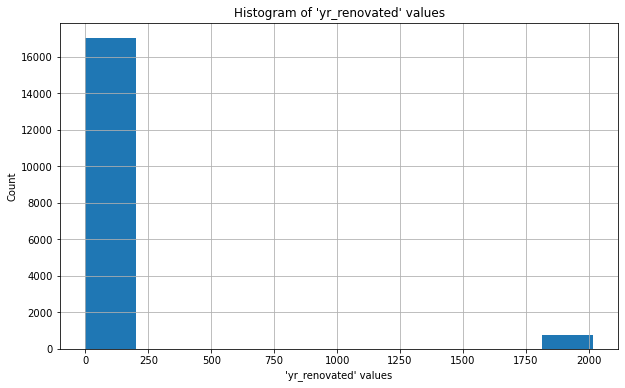

In [63]:
# Create a histogram of 'yr_renovated' values
plt.figure(figsize=(10,6))
house_data['yr_renovated'].hist()
plt.title('Histogram of \'yr_renovated\' values')
plt.xlabel('\'yr_renovated\' values')
plt.ylabel('Count')
plt.show();

**clear that most yr_renovated values are 0.Since 0 is the mode, I will replace the missing values with 0:

In [64]:
# Fill NaNs with 0 and cast to dtype 'int64'
house_data['yr_renovated'] = house_data['yr_renovated'].fillna(0)
house_data['yr_renovated'] = house_data['yr_renovated'].astype('int64')

# Confirm that all missing values have been resolved
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [65]:
# Create 'month' column
house_data['month'] = [x.split('/')[0] for x in house_data['date']]
house_data['month'] = pd.to_numeric(house_data['month'], 
                                        errors='coerce')

# Confirm that 'month' exists and is numeric
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [66]:
# Drop unneeded columns
house_data.drop(['id', 'date', 'sqft_above', 'sqft_basement'], 
                    axis=1, inplace=True)

# Review the remaining columns
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int64  
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  yr_built       21597 non-null  int64  
 11  yr_renovated   21597 non-null  int64  
 12  zipcode        21597 non-null  int64  
 13  lat            21597 non-null  float64
 14  long           21597 non-null  float64
 15  sqft_living15  21597 non-null  int64  
 16  sqft_lot15     21597 non-null  int64  
 17  month          21597 non-null  int64  
dtypes: flo

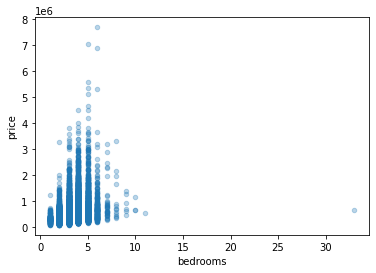

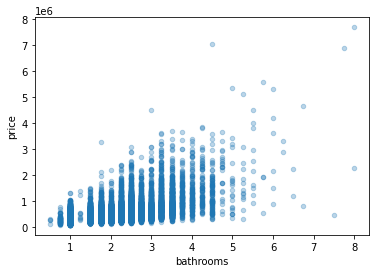

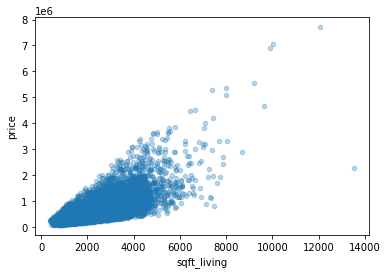

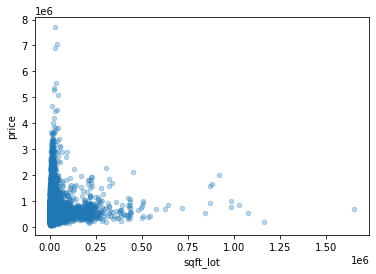

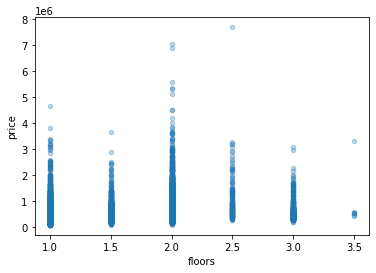

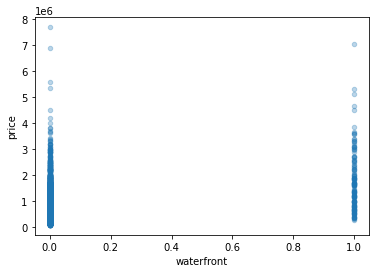

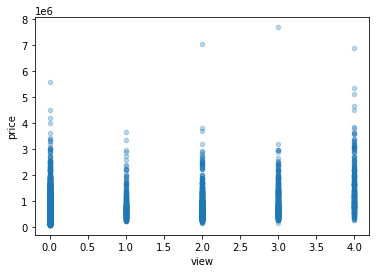

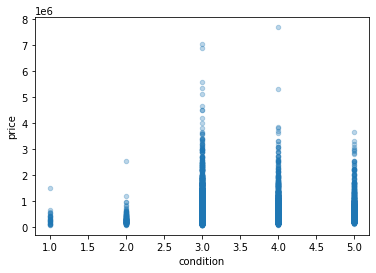

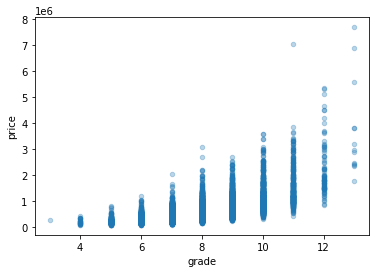

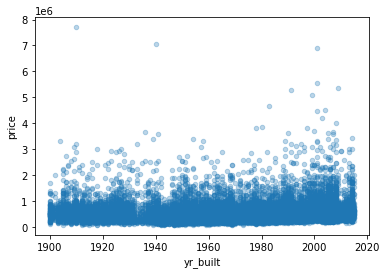

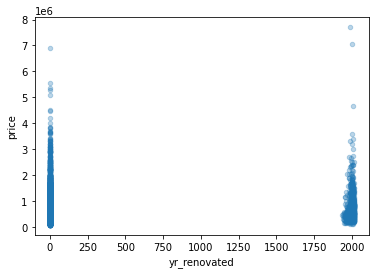

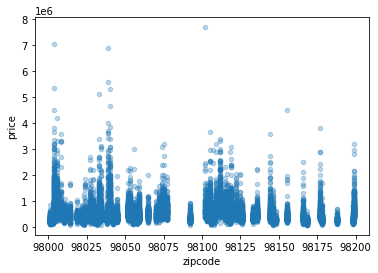

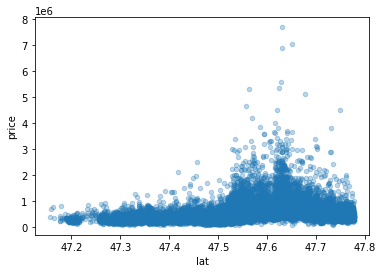

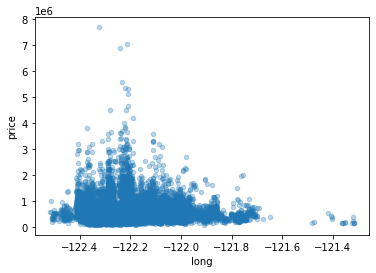

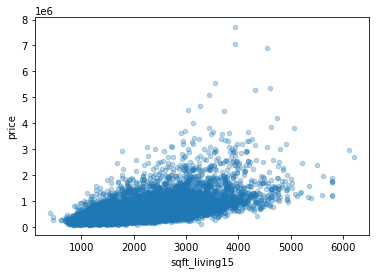

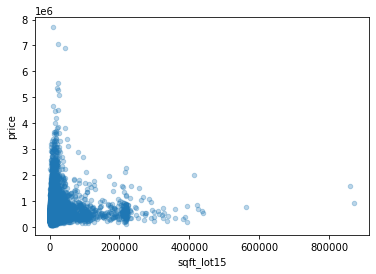

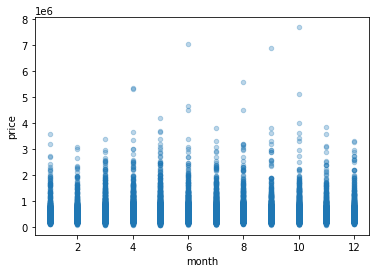

In [67]:
# Create scatterplots of all columns v. price
for column in house_data.drop('price', axis=1):
    house_data.plot(kind='scatter', x=column, y='price', alpha=0.3)
    plt.show();

***Most features appear to have a more or less linear relationship with price. 

/home/sallylareine/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


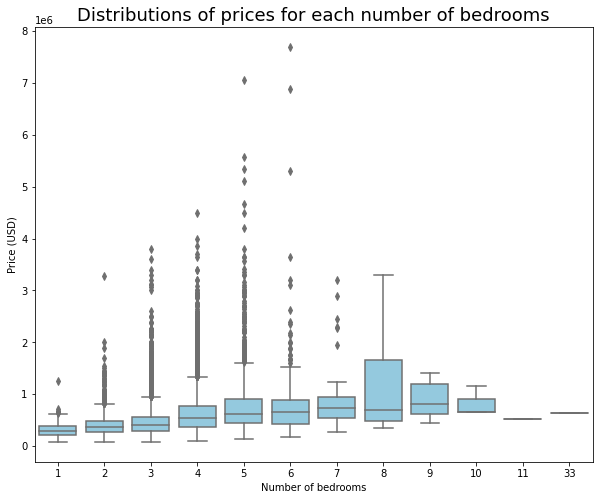

In [68]:
"""
 Checking the relationship between bedrooms and price
"""
# Create boxplots for 'bedrooms' v. 'price'
plt.figure(figsize=(10,8))
sns.boxplot(house_data['bedrooms'], house_data['price'], color='skyblue')
plt.title('Distributions of prices for each number of bedrooms', fontsize=18)
plt.xlabel('Number of bedrooms')
plt.ylabel('Price (USD)')
plt.show();

In [69]:
# Calculate percent differences in median prices
medians = []

for n in range(2,6):
    medians.append(house_data[house_data['bedrooms'] == n]['price'].median())

percent_differences = []
for m in range(0,len(medians)-1):
    percent_differences.append(round(((medians[m+1] - medians[m]) / medians[m]),2))
    
percent_differences   

[0.1, 0.33, 0.13]

**The biggest difference in median price is between four and three bedrooms, where there is an increase of 33%.

/home/sallylareine/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


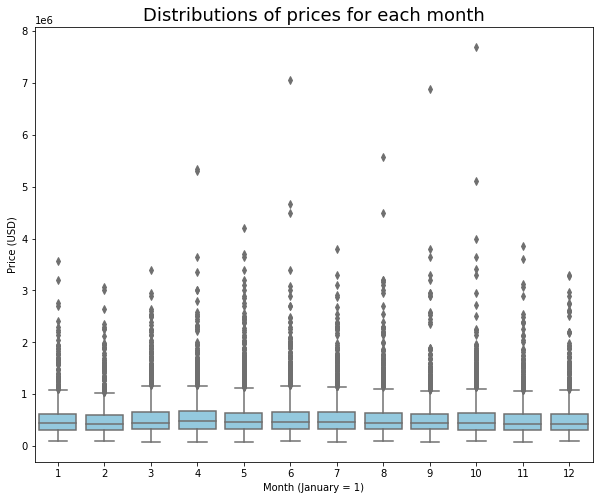

In [70]:
# Create a boxplot to compare 'month' and 'price'
plt.figure(figsize=(10,8))
sns.boxplot(house_data['month'], house_data['price'], color='skyblue')
plt.title('Distributions of prices for each month', fontsize=18)
plt.xlabel('Month (January = 1)')
plt.ylabel('Price (USD)')
plt.show();

**median prices appear to be higher in April through July than in November through February.

**investigating relationship between grade and price?

/home/sallylareine/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


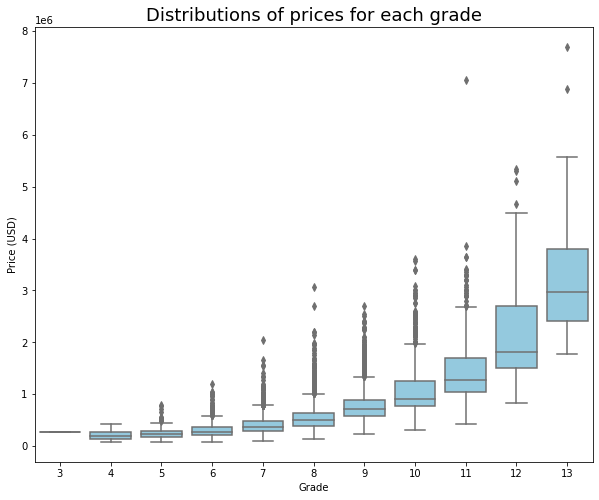

In [71]:
# Create boxplots to compare 'grade' and 'price'
plt.figure(figsize=(10,8))
sns.boxplot(house_data['grade'], house_data['price'], color='skyblue')
plt.title('Distributions of prices for each grade', fontsize=18)
plt.xlabel('Grade')
plt.ylabel('Price (USD)')
plt.show();

** There's a substantial differences in price based on the grade of a house.e.g only the outliers of grade-5 houses fall within the price range of grade-11 houses.

## Modelling

## First Model

In [72]:
# Import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [73]:
# Split the cleaned data into features and target
house_data_features = house_data.drop(['price'], axis=1)
house_data_target = house_data['price']

In [74]:
# A function to run OLS and return model summary
def model_it(data, features):
    
    """Fit an OLS model and return model summary
    data: a DataFrame containing both features and target
    features: identical to 'data', but with the target dropped"""
    
    features_sum = '+'.join(features.columns)
    formula = 'price' + '~' + features_sum

    model = ols(formula=formula, data=data).fit()
    return model.summary()

In [75]:
# Fit the model and return summary
model_it(house_data, house_data_features)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2952.
Date:                Thu, 15 Dec 2022   Prob (F-statistic):               0.00
Time:                        22:36:57   Log-Likelihood:            -2.9346e+05
No. Observations:               21534   AIC:                         5.870e+05
Df Residuals:                   21516   BIC:                         5.871e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      9.999e+06    2.9e+06      3.453      0.001    4.32e+06    1.57e+07
bedrooms      -3.606e+04   1896.776    -19.009      0.000   -3.98e+04   -3.23e+04
bathrooms      3.716e+04   3217.155     11.551      0.000    3.09e+04    4.35e+04
sqft_living     169.4729      3.345     50.664      0.000     162.916     176.029
sqft_lot          0.1371      0.048      2.869      0.004       0.043       0.231
floors         1.929e+04   3221.834      5.986      0.000     1.3e+04    2.56e+04
waterfront     6.014e+05   1.81e+04     33.146      0.000    5.66e+05    6.37e+05
view           5.206e+04   2091.371     24.891      0.000     4.8e+04    5.62e+04
condition      2.568e+04   2334.328     11.000      0.000    2.11e+04    3.03e+04
grade          9.905e+04   2134.475     46.407      0.000    9.49e+04    1.03e+05
yr_built      -2632.7679     71.802    -36.667      0.000   -2773.506   -2492.030
yr_renovated     23.8731      3.967      6.019      0.000      16.098      31.648
zipcode        -595.7200     32.924    -18.094      0.000    -660.253    -531.187
lat            5.939e+05   1.06e+04     55.778      0.000    5.73e+05    6.15e+05
long          -2.019e+05   1.29e+04    -15.618      0.000   -2.27e+05   -1.77e+05
sqft_living15    24.9993      3.408      7.336      0.000      18.320      31.678
sqft_lot15       -0.3780      0.073     -5.168      0.000      -0.521      -0.235
month         -3040.0399    439.453     -6.918      0.000   -3901.400   -2178.680
==============================================================================
Omnibus:                    18388.735   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1890860.832
Skew:                           3.586   Prob(JB):                         0.00
Kurtosis:                      48.343   Cond. No.                     2.13e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

** An adjusted R-squared value of 0.7 implies that the model explains 70% of the variability in price.
 The Jarque-Bera score is very high, however, and that suggests that the residuals are not normally distributed--not a good thing for linear regression!**

## Second Model

In [76]:

#Running the model again, this time dropping unwanted features (long and sqft_lot15).
# Drop unwanted features and rerun the modeling function
house_data_features_fewer = house_data_features.drop(['long', 'sqft_lot15'], axis=1)

model_it(house_data, house_data_features_fewer)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     3283.
Date:                Thu, 15 Dec 2022   Prob (F-statistic):               0.00
Time:                        22:38:54   Log-Likelihood:            -2.9360e+05
No. Observations:               21534   AIC:                         5.872e+05
Df Residuals:                   21518   BIC:                         5.874e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       1.31e+07    2.9e+06      4.512      0.000    7.41e+06    1.88e+07
bedrooms      -3.515e+04   1907.091    -18.432      0.000   -3.89e+04   -3.14e+04
bathrooms      4.033e+04   3232.670     12.476      0.000     3.4e+04    4.67e+04
sqft_living     165.7949      3.358     49.372      0.000     159.213     172.377
sqft_lot         -0.1369      0.034     -3.991      0.000      -0.204      -0.070
floors         2.043e+04   3241.362      6.304      0.000    1.41e+04    2.68e+04
waterfront     6.023e+05   1.83e+04     32.983      0.000    5.67e+05    6.38e+05
view            5.46e+04   2099.043     26.012      0.000    5.05e+04    5.87e+04
condition      2.585e+04   2349.362     11.002      0.000    2.12e+04    3.05e+04
grade           1.04e+05   2127.578     48.901      0.000    9.99e+04    1.08e+05
yr_built      -2918.9085     70.101    -41.639      0.000   -3056.311   -2781.506
yr_renovated     21.6322      3.990      5.421      0.000      13.811      29.454
zipcode        -366.9366     29.867    -12.286      0.000    -425.478    -308.395
lat            5.873e+05   1.07e+04     54.869      0.000    5.66e+05    6.08e+05
sqft_living15    13.8481      3.365      4.115      0.000       7.252      20.444
month         -2996.9400    442.322     -6.775      0.000   -3863.924   -2129.956
==============================================================================
Omnibus:                    18586.146   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1909109.374
Skew:                           3.652   Prob(JB):                         0.00
Kurtosis:                      48.545   Cond. No.                     2.10e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Testing for linear model assumptions

In [ ]:
# Import needed package, prep input, and generate Q-Q plots
from scipy import stats

columns_for_qq = mh_zips_encoded_features.columns

for column in columns_for_qq:
    formula = 'price' + '~' + column
    model = ols(formula=formula, data=mh_zips_encoded).fit()
    sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    plt.title('QQ plot for ' + str(column))
    plt.show();
    fig = plt.figure(figsize=(16,14))
    fig = sm.graphics.plot_regress_exog(model, column, fig=fig)